In [4]:
import pandas as pd

prot2gene = pd.read_csv("prot2gene.tsv", sep=r"\s+", header=None, names=["protein_id", "gene_id"])
prot2gene.head()

,protein_id,gene_id
0,Al_scaffold_0001_1000,Al_scaffold_0001_1000
1,Al_scaffold_0001_1004,Al_scaffold_0001_1004
2,Al_scaffold_0001_1015,Al_scaffold_0001_1015
3,Al_scaffold_0001_1024,Al_scaffold_0001_1024
4,Al_scaffold_0001_1030,Al_scaffold_0001_1030


In [5]:
# all genes
all_genes_df = prot2gene["gene_id"].drop_duplicates().to_frame(name="gene_id")
len(all_genes_df)

31478

In [6]:
strict=pd.read_csv("Alyrata_clusters_strict_raw.tsv", sep=r"\s+")
strict.head()

,gene_id,cluster_id,cluster_size,dup_status
0,Al_scaffold_0001_2747,C000001,70,duplicate
1,Al_scaffold_0002_315,C000001,70,duplicate
2,Al_scaffold_0003_1822,C000001,70,duplicate
3,Al_scaffold_0003_1854,C000001,70,duplicate
4,Al_scaffold_0004_1146,C000001,70,duplicate


In [7]:
medium =pd.read_csv("Alyrata_clusters_medium_raw.tsv", sep=r"\s+")
medium.head()

,gene_id,cluster_id,cluster_size,dup_status
0,Al_scaffold_0001_3306,C000001,210,duplicate
1,Al_scaffold_0003_1295,C000001,210,duplicate
2,Al_scaffold_0004_1399,C000001,210,duplicate
3,Al_scaffold_0005_1732,C000001,210,duplicate
4,Al_scaffold_0005_3241,C000001,210,duplicate


In [8]:
lenient =pd.read_csv("Alyrata_clusters_lenient_raw.tsv", sep=r"\s+")
lenient.head()

,gene_id,cluster_id,cluster_size,dup_status
0,Al_scaffold_0001_1133,C000001,462,duplicate
1,Al_scaffold_0001_1139,C000001,462,duplicate
2,Al_scaffold_0001_1145,C000001,462,duplicate
3,Al_scaffold_0001_1673,C000001,462,duplicate
4,Al_scaffold_0001_3504,C000001,462,duplicate


In [9]:
def add_singletons(cluster_df, all_genes_df):
    merged = all_genes_df.merge(cluster_df[["gene_id","cluster_id","cluster_size"]], 
                                on="gene_id", how="left")
    def classify(row):
        if pd.isna(row["cluster_size"]):
            return "singleton"
        if row["cluster_size"] == 1:
            return "singleton"
        return "duplicate"
    merged["dup_status"] = merged.apply(classify, axis=1)
    return merged

In [26]:
strict_full  = add_singletons(strict, all_genes_df)
medium_full  = add_singletons(medium, all_genes_df)
lenient_full = add_singletons(lenient, all_genes_df)

In [12]:
print("STRICT:")
print(strict_full["dup_status"].value_counts())
print(100*strict_full["dup_status"].value_counts(normalize=True))


print("\nMEDIUM:")
print(medium_full["dup_status"].value_counts())
print(100*medium_full["dup_status"].value_counts(normalize=True))


print("\nLENIENT:")
print(lenient_full["dup_status"].value_counts())
print(100*lenient_full["dup_status"].value_counts(normalize=True))

STRICT:
dup_status
duplicate    17931
singleton    13547
Name: count, dtype: int64
dup_status
duplicate    56.963594
singleton    43.036406
Name: proportion, dtype: float64

MEDIUM:
dup_status
duplicate    22576
singleton     8902
Name: count, dtype: int64
dup_status
duplicate    71.719931
singleton    28.280069
Name: proportion, dtype: float64

LENIENT:
dup_status
duplicate    24111
singleton     7367
Name: count, dtype: int64
dup_status
duplicate    76.596353
singleton    23.403647
Name: proportion, dtype: float64


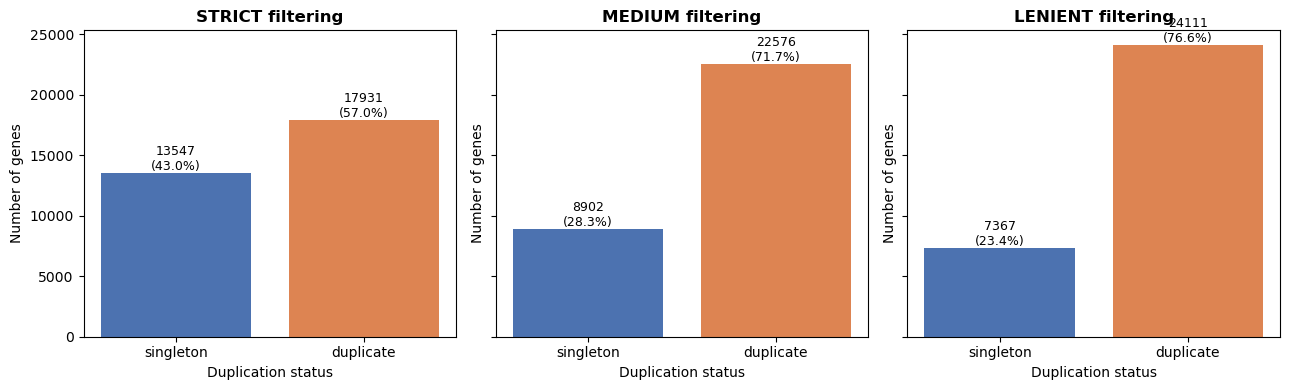

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Fixed category order
statuses = ["singleton", "duplicate"]

# Dictionary for easy looping
datasets = {
    "STRICT": strict_full,
    "MEDIUM": medium_full,
    "LENIENT": lenient_full
}

# Create a row of 3 plots
fig, axes = plt.subplots(1, 3, figsize=(13, 4), sharey=True)

for ax, (title, df_mode) in zip(axes, datasets.items()):
    
    #  Compute counts and percentages 
    counts = df_mode["dup_status"].value_counts().reindex(statuses, fill_value=0)
    perc   = 100 * counts / counts.sum()
    
    #  Draw bars 
    bars = ax.bar(statuses, counts.values, color=["#4C72B0", "#DD8452"])
    
    # Annotate each bar with count and percentage 
    for i, (n, p) in enumerate(zip(counts.values, perc.values)):
        ax.text(
            i, n, 
            f"{n}\n({p:.1f}%)", 
            ha="center", va="bottom", fontsize=9
        )
    
    #  Titles and labels 
    ax.set_title(f"{title} filtering", fontsize=12, weight="bold")
    ax.set_xlabel("Duplication status", fontsize=10)
    ax.set_ylabel("Number of genes", fontsize=10)

# Make layout tight and pretty
plt.tight_layout()
plt.show()

Old version, with different parametres of filtering. For comparer the results.

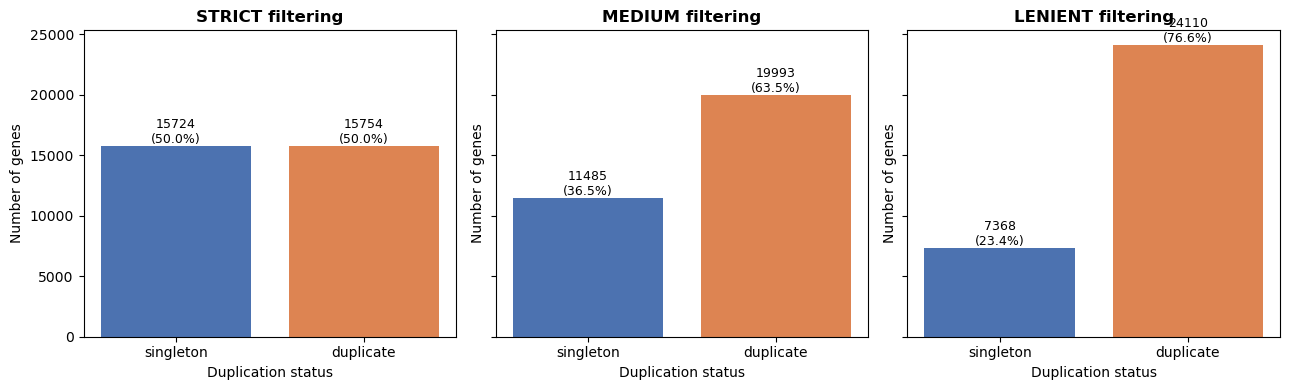

In [51]:


import matplotlib.pyplot as plt
import numpy as np

# Fixed category order
statuses = ["singleton", "duplicate"]

# Dictionary for easy looping
datasets = {
    "STRICT": strict_full,
    "MEDIUM": medium_full,
    "LENIENT": lenient_full
}

# Create a row of 3 plots
fig, axes = plt.subplots(1, 3, figsize=(13, 4), sharey=True)

for ax, (title, df_mode) in zip(axes, datasets.items()):
    
    #  Compute counts and percentages 
    counts = df_mode["dup_status"].value_counts().reindex(statuses, fill_value=0)
    perc   = 100 * counts / counts.sum()
    
    #  Draw bars 
    bars = ax.bar(statuses, counts.values, color=["#4C72B0", "#DD8452"])
    
    # Annotate each bar with count and percentage 
    for i, (n, p) in enumerate(zip(counts.values, perc.values)):
        ax.text(
            i, n, 
            f"{n}\n({p:.1f}%)", 
            ha="center", va="bottom", fontsize=9
        )
    
    #  Titles and labels 
    ax.set_title(f"{title} filtering", fontsize=12, weight="bold")
    ax.set_xlabel("Duplication status", fontsize=10)
    ax.set_ylabel("Number of genes", fontsize=10)

# Make layout tight and pretty
plt.tight_layout()
plt.show()


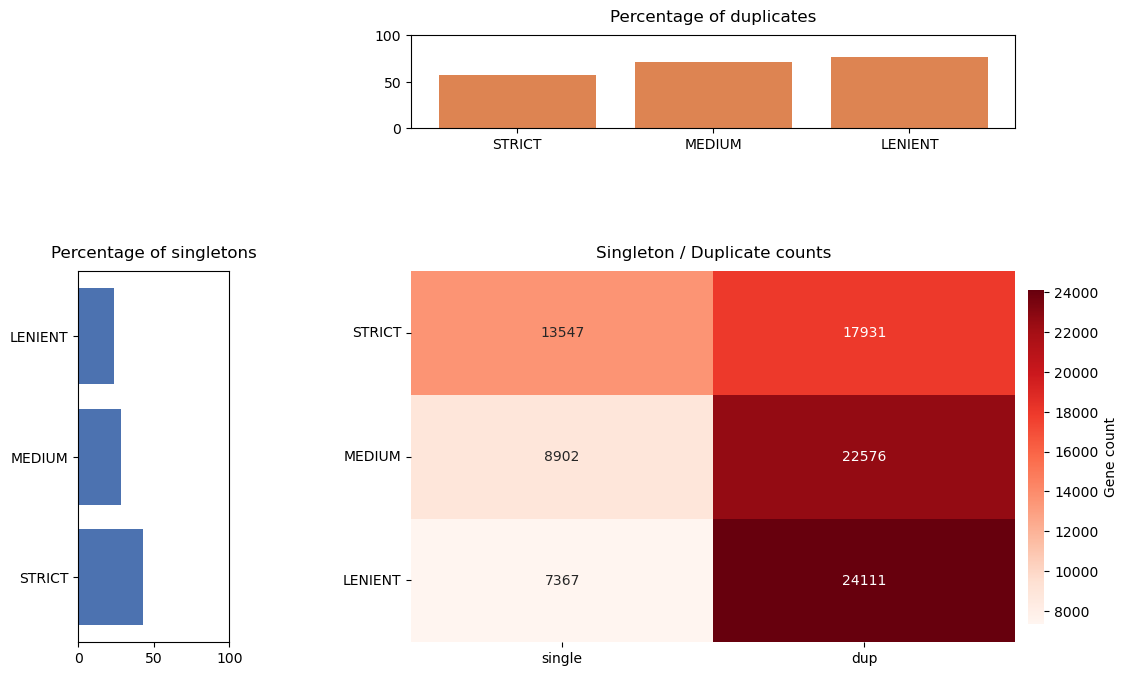

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
grid = fig.add_gridspec(
    3, 3,
    width_ratios=[1, 4, 0.25],
    height_ratios=[1, 4, 1],
    wspace=0.25, hspace=0.35
)

# Top barplot (duplicate %)
ax_top = fig.add_subplot(grid[0, 1])
ax_top.bar(["STRICT", "MEDIUM", "LENIENT"], percent_dups, color="#DD8452")
ax_top.set_title("Percentage of duplicates", pad=10)
ax_top.set_ylim(0, 100)
ax_top.set_xlabel("")                 # <- чтобы ничего не лезло вниз
ax_top.tick_params(axis="x", labelsize=10)

# Left barplot (singleton %)
ax_left = fig.add_subplot(grid[1, 0])
ax_left.barh(["STRICT", "MEDIUM", "LENIENT"], percent_sing, color="#4C72B0")
ax_left.set_xlim(0, 100)
ax_left.set_title("Percentage of singletons", pad=10)
ax_left.set_ylabel("")
ax_left.tick_params(axis="y", labelsize=10)

# Heatmap
ax_heat = fig.add_subplot(grid[1, 1])
sns.heatmap(
    heatmap_matrix,
    annot=True, fmt="d",
    cmap="Reds",
    xticklabels=["single", "dup"],     # <- короче подписи
    yticklabels=["STRICT", "MEDIUM", "LENIENT"],
    cbar_kws={"label": "Gene count", "shrink": 0.9, "pad": 0.02},
    ax=ax_heat
)

ax_heat.set_title("Singleton / Duplicate counts", pad=10)


ax_heat.set_xlabel("")
ax_heat.set_ylabel("")


ax_heat.tick_params(axis="x", rotation=0, labelsize=10)
ax_heat.tick_params(axis="y", rotation=0, labelsize=10)

plt.show()


In [13]:
# we take only genes that have a cluster and leave each cluster once
families_medium = (
    medium_full
    .dropna(subset=["cluster_id"])             
    [["cluster_id", "cluster_size"]]
    .drop_duplicates()                          
)

families_medium.head()

,cluster_id,cluster_size
0,C001619,3.0
1,C000099,23.0
2,C000535,7.0
5,C000252,12.0
6,C000100,23.0


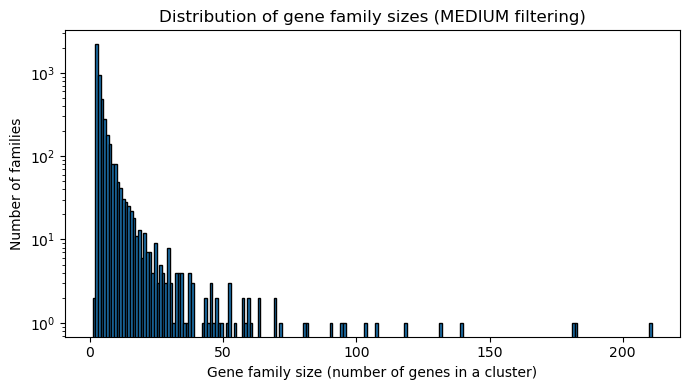

In [18]:
max_size = int(families_medium["cluster_size"].max())

plt.figure(figsize=(7,4))
plt.hist(
    families["cluster_size"],
    bins=range(1, max_size + 2),
    edgecolor="black"
)
plt.xlabel("Gene family size (number of genes in a cluster)")
plt.ylabel("Number of families")
plt.title("Distribution of gene family sizes (MEDIUM filtering)")
plt.yscale("log")  
plt.tight_layout()
plt.show()

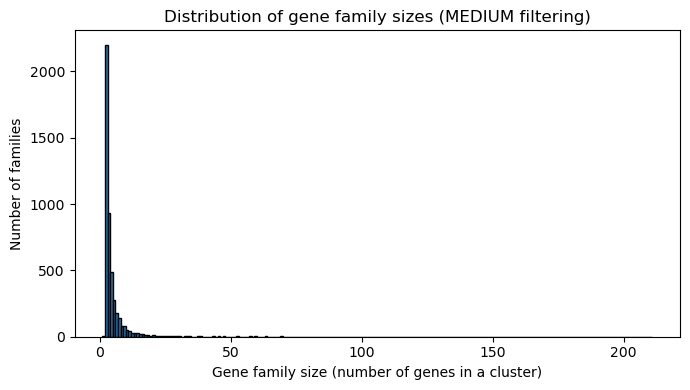

In [19]:
max_size = int(families_medium["cluster_size"].max())

plt.figure(figsize=(7,4))
plt.hist(
    families["cluster_size"],
    bins=range(1, max_size + 2),
    edgecolor="black"
)
plt.xlabel("Gene family size (number of genes in a cluster)")
plt.ylabel("Number of families")
plt.title("Distribution of gene family sizes (MEDIUM filtering)")
plt.tight_layout()
plt.show()


### STRICT vs MEDIUM vs LENIENT 

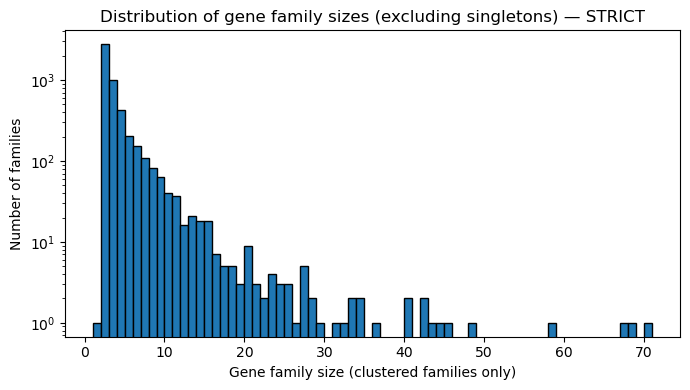

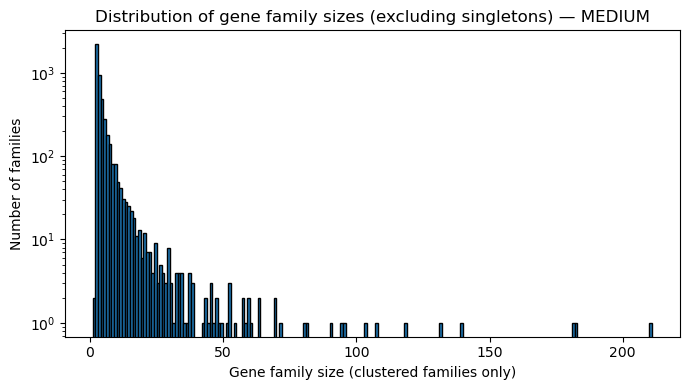

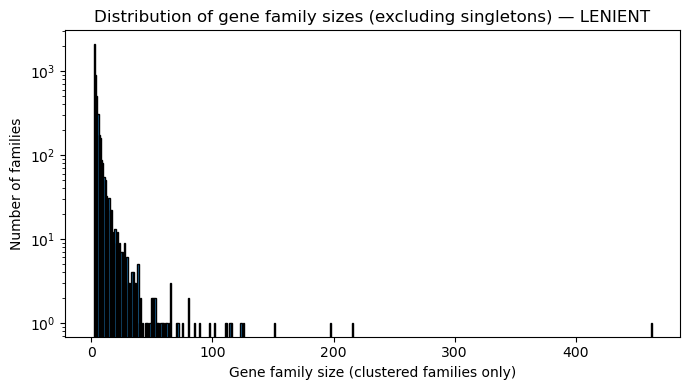

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def family_sizes_without_singletons(full_df):
    # keep only clustered genes and count each cluster once
    families = (
        full_df.dropna(subset=["cluster_id"])
              .loc[:, ["cluster_id", "cluster_size"]]
              .drop_duplicates(subset=["cluster_id"])
    )
    return families["cluster_size"].astype(int).to_numpy()

datasets = {
    "STRICT": strict_full,
    "MEDIUM": medium_full,
    "LENIENT": lenient_full
}

for name, df in datasets.items():
    sizes = family_sizes_without_singletons(df)
    max_size = int(sizes.max())

    plt.figure(figsize=(7, 4))
    plt.hist(
        sizes,
        bins=range(1, max_size + 2),
        edgecolor="black"
    )
    plt.xlabel("Gene family size (clustered families only)")
    plt.ylabel("Number of families")
    plt.title(f"Distribution of gene family sizes (excluding singletons) — {name}")
    plt.yscale("log")
    plt.tight_layout()
    plt.show()


In [21]:
n_families = families_medium[families_medium["cluster_size"] >= 2]["cluster_id"].nunique()
print("Number of gene families (cluster size ≥2):", n_families)

Number of gene families (cluster size ≥2): 4750


In [23]:
def family_category(size):
    if size == 2:
        return "2"
    elif 3 <= size <= 5:
        return "3–5"
    else:
        return ">5"

families_medium["size_class"] = families_medium["cluster_size"].apply(family_category)
families_medium["size_class"].value_counts()

size_class
2      2200
3–5    1697
>5      855
Name: count, dtype: int64

In [28]:
# we take only genes that have a cluster and leave each cluster once
families_strict = (
    strict_full
    .dropna(subset=["cluster_id"])             
    [["cluster_id", "cluster_size"]]
    .drop_duplicates()                          
)

In [29]:
families_strict["size_class"] = families_strict["cluster_size"].apply(family_category)
families_strict["size_class"].value_counts()

size_class
2      2772
3–5    1623
>5      634
Name: count, dtype: int64

In [31]:
# we take only genes that have a cluster and leave each cluster once
families_lenient = (
  lenient_full
    .dropna(subset=["cluster_id"])             
    [["cluster_id", "cluster_size"]]
    .drop_duplicates()                          
)

In [32]:
families_lenient["size_class"] = families_lenient["cluster_size"].apply(family_category)
families_lenient["size_class"].value_counts()

size_class
2      2077
3–5    1706
>5      917
Name: count, dtype: int64

In [33]:
import pandas as pd

data = {
    "size_class": ["2", "3–5", ">5"] * 3,
    "count": [
        2772, 1623, 634,   # STRICT
        2200, 1697, 855,   # MEDIUM
        2077, 1706, 917    # LENIENT
    ],
    "filtering": (
        ["Strict"] * 3 +
        ["Medium"] * 3 +
        ["Lenient"] * 3
    )
}

df_plot = pd.DataFrame(data)


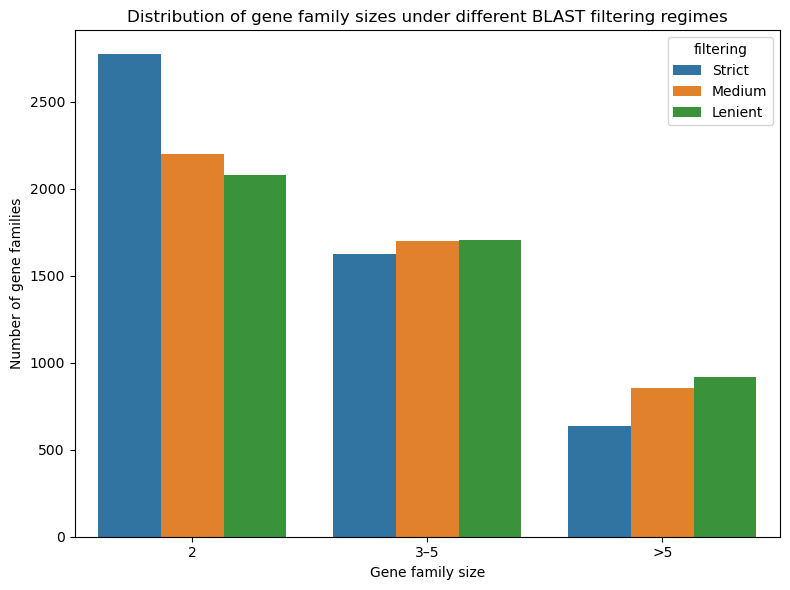

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.barplot(
    data=df_plot,
    x="size_class",
    y="count",
    hue="filtering"
)

plt.xlabel("Gene family size")
plt.ylabel("Number of gene families")
plt.title("Distribution of gene family sizes under different BLAST filtering regimes")
plt.tight_layout()
plt.show()
